# ***Assignent: 3 Pandas***

#Task 1: Working with Series

In [8]:
# 1. Create a Pandas Series from the following list:
# data = [25, 30, 35, 40, 45]
# 2. Write a Python program to:
# o Assign custom indices ['A', 'B', 'C', 'D', 'E'] to the Series.
# o Display the first three elements of the Series.
# o Calculate the mean, median, and standard deviation of the
# Series.

import pandas as pd
data = [25, 30, 35, 40, 45]
series = pd.Series(data)
series.index = ['A', 'B', 'C', 'D', 'E']
print(series.head(3))
print("Mean:", series.mean())
print("Median:", series.median())
print("Standard Deviation:", series.std())

A    25
B    30
C    35
dtype: int64
Mean: 35.0
Median: 35.0
Standard Deviation: 7.905694150420948


#Task 2: Creating and Inspecting DataFrames

In [9]:
# 1. Create a Pandas DataFrame with the following data:
# Name Age Gender Marks
# Alice 20 Female 85
# Bob 22 Male 78
# Carol 19 Female 92
# David 21 Male 74
# Eve 20 Female 88
# 2. Write a Python program to:
# o Display the first two rows of the DataFrame.
# o Display the column names, data types, and summary statistics.
# o Add a new column Passed that contains True if Marks >= 80
# and False otherwise.

data = {'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
        'Age': [20, 22, 19, 21, 20],
        'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
        'Marks': [85, 78, 92, 74, 88]}
df = pd.DataFrame(data)
print("First two rows of the DataFrame:")
print(df.head(2))
print("\nColumn names, data types, and summary statistics:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))
df['Passed'] = df['Marks'] >= 80
print("\nDataFrame with 'Passed' column:")
df

First two rows of the DataFrame:
    Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78

Column names, data types, and summary statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Gender  5 non-null      object
 3   Marks   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None

Summary statistics:
         Name        Age  Gender      Marks
count       5   5.000000       5   5.000000
unique      5        NaN       2        NaN
top     Alice        NaN  Female        NaN
freq        1        NaN       3        NaN
mean      NaN  20.400000     NaN  83.400000
std       NaN   1.140175     NaN   7.334848
min       NaN  19.000000     NaN  74.000000
25%       NaN  20.000000     NaN  78.000000
50%       NaN  20.000000     NaN  85

,Name,Age,Gender,Marks,Passed
0,Alice,20,Female,85,True
1,Bob,22,Male,78,False
2,Carol,19,Female,92,True
3,David,21,Male,74,False
4,Eve,20,Female,88,True


#Task 3: Data Selection and Filtering

In [10]:

# 1. Using the DataFrame from Task 2, write a Python program to:
# o Select and display the Name and Marks columns.
# o Filter and display records where Marks > 80.
# o Display the record of the student with the highest marks.

print(df[['Name', 'Marks']])
print("\nRecords where Marks > 80:")
print(df[df['Marks'] > 80])
print()
print(df.loc[df['Marks'].idxmax()])

    Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88

Records where Marks > 80:
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True

Name       Carol
Age           19
Gender    Female
Marks         92
Passed      True
Name: 2, dtype: object


#Task 4: Handling Missing Data

In [17]:
# 1. Modify the DataFrame from Task 2 by introducing missing values:
# 2. df.loc[1, 'Marks'] = None
# 3. df.loc[4, 'Age'] = None
# 4. Write a Python program to:
# o Identify missing values in the DataFrame.
# o Fill missing values in the Marks column with the column's
# mean.
# o Drop rows where the Age column has missing values.
df1= df.copy()
df1.loc[1, 'Marks'] = None
df1.loc[4, 'Age'] = None

print(df)
print("\nMissing values in the DataFrame:")
print(df1.isnull())

df1['Marks'].fillna(df1['Marks'].mean(), inplace=True)

df1.dropna(subset=['Age'], inplace=True)

print("\nDataFrame after handling missing values:")
print(df1)

    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female   85.0    True
1    Bob  22.0    Male    NaN   False
2  Carol  19.0  Female   92.0    True
3  David  21.0    Male   74.0   False
4    Eve   NaN  Female   88.0    True

Missing values in the DataFrame:
    Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False

DataFrame after handling missing values:
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False
------------------------------


#Task 5: Grouping and Aggregation

In [18]:
# 1. Using the DataFrame from Task 2, write a Python program to:
# o Group the data by Gender and calculate the mean age and
# marks for each gender.
# o Count the number of students in each gender group.

gender_grouped = df.groupby('Gender')

mean_age_marks = gender_grouped[['Age', 'Marks']].mean()
print("\nMean Age and Marks by Gender:")
print(mean_age_marks)

student_counts = gender_grouped.size()
print("\nNumber of Students by Gender:")
student_counts


Mean Age and Marks by Gender:
         Age      Marks
Gender                 
Female  19.5  88.333333
Male    21.5  74.000000

Number of Students by Gender:


,0
Gender,
Female,3
Male,2


#Task 6: Reading and Writing Data

In [19]:
# 1. Write a Python program to:
# o Save the modified DataFrame from Task 4 to a CSV file named
# students_data.csv.
# o Read the CSV file into a new DataFrame.
# o Display the first five rows of the newly loaded DataFrame.

# Save the modified DataFrame to a CSV file
df1.to_csv('students_data.csv', index=False)
print("DataFrame saved to students_data.csv")


DataFrame saved to students_data.csv


In [20]:
# Read the CSV file into a new DataFrame
loaded_df = pd.read_csv('students_data.csv')
print("\nDataFrame loaded from students_data.csv:")
# Display the first five rows of the newly loaded DataFrame
print(loaded_df.head())


DataFrame loaded from students_data.csv:
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


#Task 7: General

In [22]:
# 1. Download a sample dataset from Kaggle or use any public dataset.
# 2. Write a Python program to:
# o Load the dataset using Pandas named california_housing_test.csv
# o Perform exploratory data analysis (EDA) by summarizing key
# statistics, checking for missing values, and visualizing data
# trends using Matplotlib or Seaborn.
# o Document your findings in Markdown or comments.


df_housing = pd.read_csv('california_housing_test.csv')


print("\n--- Summary Statistics ---")
print(df_housing.describe())

print("\n--- Missing Values ---")
print(df_housing.isnull().sum())


--- Summary Statistics ---
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.

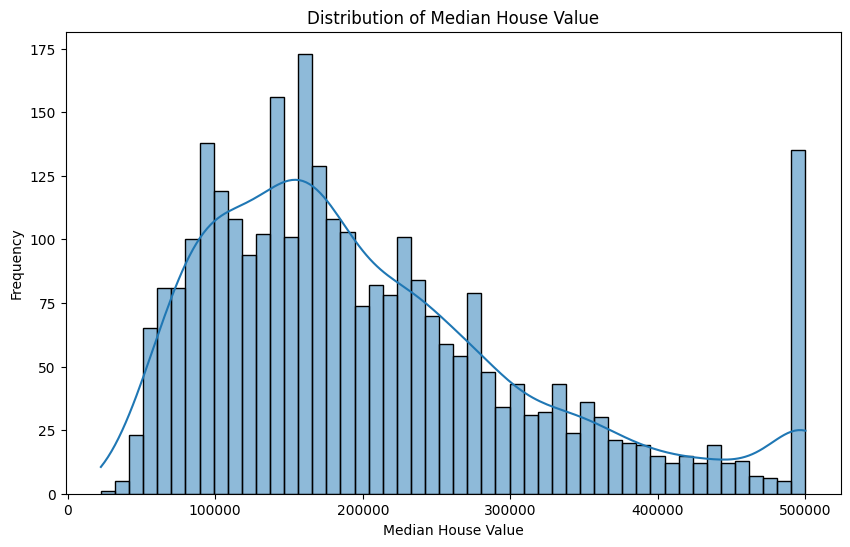

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize data trends

# Distribution of median house value
plt.figure(figsize=(10, 6))
sns.histplot(df_housing['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()




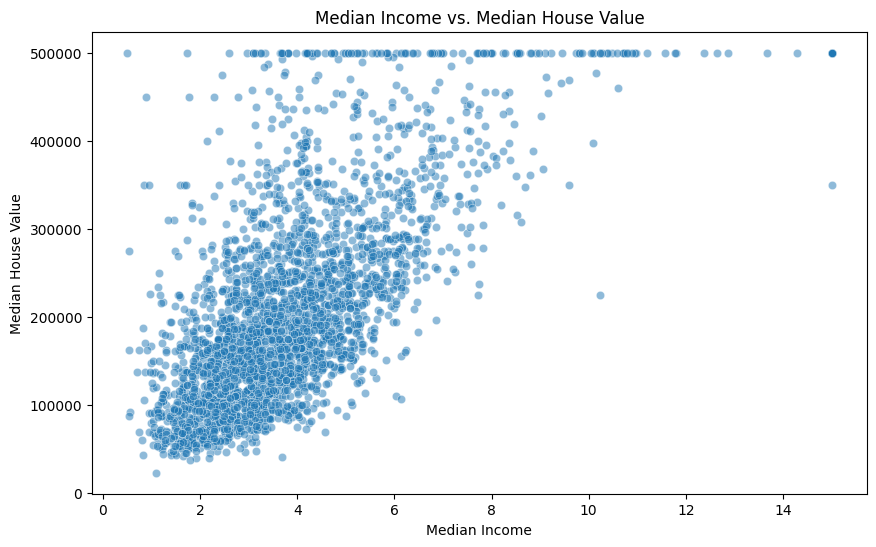

In [24]:
# Relationship between median income and median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_housing, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



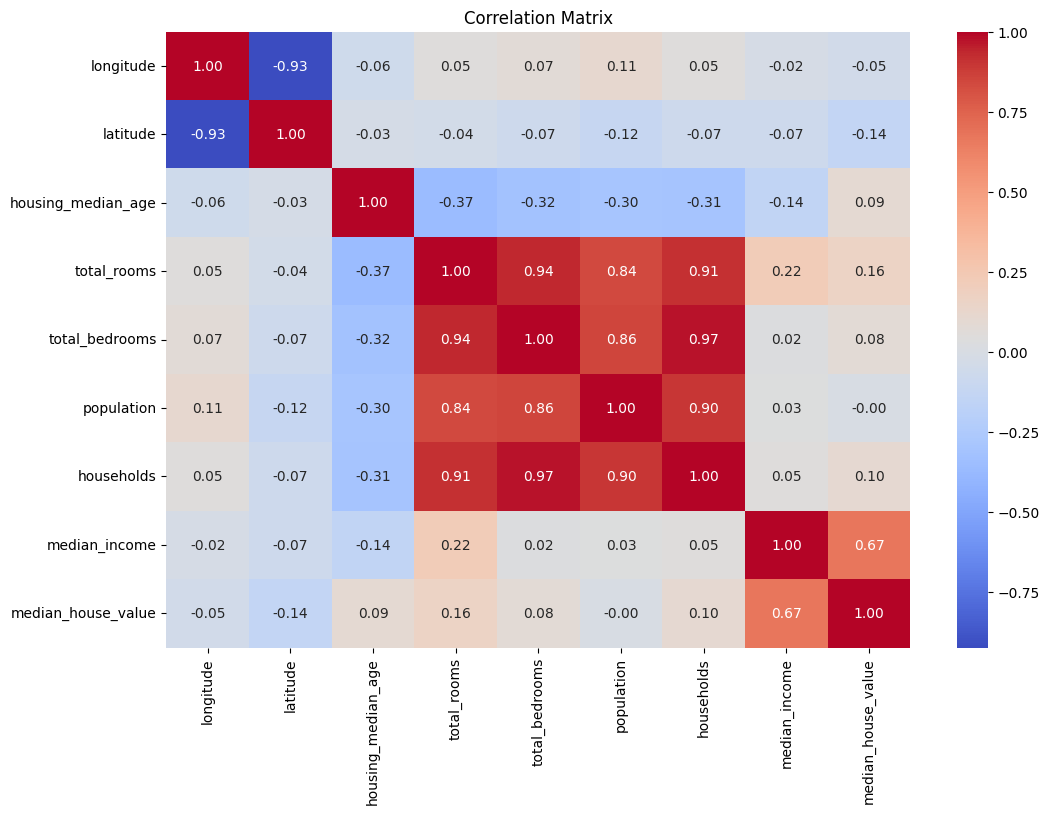

In [26]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_housing.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Documentation
**California housing test dataset**

*   This data set includes longitude, latitude, housing_median_age, total_rooms, total_bedrooms_populations, households, median_income_meadian_house_value.
  1. *longitude:* A measure of how far west a house is; a higher value is farther west

  2. *latitude:* A measure of how far north a house is; a higher value is farther north

  3. *housingMedianAge:* Median age of a house within a block; a lower number is a newer building

  4. *totalRooms:* Total number of rooms within a block

  5. *totalBedrooms:* Total number of bedrooms within a block

  6. *population:* Total number of people residing within a block

  7. *households:* Total number of households, a group of people residing within a home unit, for a block

  8. *medianIncome:* Median income for households within a block of houses (measured in tens of thousands of US Dollars)

  9. *medianHouseValue:* Median house value for households within a block (measured in US Dollars)
*   The mean of meadian house value is $205846.27500.

*   The meadian house value is positively correlated with mean_income which mean person with higher income buys house with higher value.
*   Total rooms and total bedrooms have a strong positive correlation of about 0.98.
*   The standard deviation of the median house value is approximately $113,120, indicating significant variability.
*   The average age of housing is about 29 years.


